In [19]:
import heartpy as hp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cheby2, sosfilt

In [20]:
cov4_baseline_bvp = hp.get_data('cov14_baseline_BVP.csv')

In [21]:
cov4_baseline_bvp = cov4_baseline_bvp[2:]

In [67]:
# Define filter parameters
order = 4      # Order of the filter
stopband_attenuation = 20    # Minimum attenuation required in the stopband (in dB)
# when i experiment with stopband val, i dont see a noticable change from 2-25ish
cutoff_frequency = 17        # Cutoff frequency in Hz (adjust as needed)
sampling_rate = 64.0          # The sampling rate of your BVP signal

# Design the Chebyshev type II filter
sos = cheby2(order, stopband_attenuation, cutoff_frequency, 'hp', fs=sampling_rate, output='sos')

# Apply the filter to your BVP signal
filtered_bvp = sosfilt(sos, cov4_baseline_bvp)

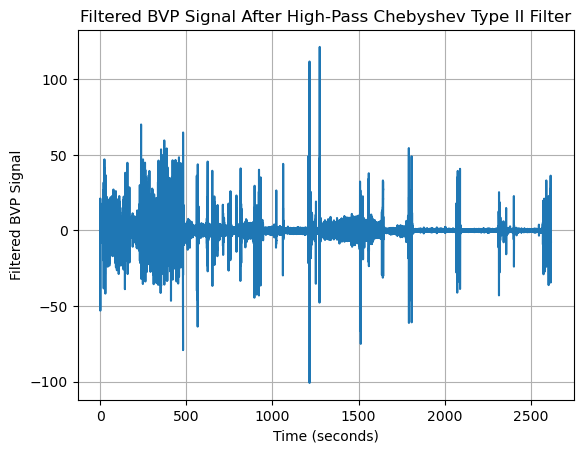

In [68]:
# Create a time array based on the length of the filtered signal and the sampling rate
time = [i / sampling_rate for i in range(len(filtered_bvp))]

# Plot the filtered BVP signal
plt.plot(time, filtered_bvp)
plt.xlabel('Time (seconds)')
plt.ylabel('Filtered BVP Signal')
plt.title('Filtered BVP Signal After High-Pass Chebyshev Type II Filter')
plt.grid(True)
plt.show()